In [355]:
from sklearn import svm,metrics
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import random
matplotlib.rcParams['axes.unicode_minus'] = False  # 마이너스 표시 해결
# 한글설정
matplotlib.rcParams['font.family'] = 'Malgun Gothic' # windows 사용자
# matplotlib.rcParams['font.family'] = 'AppleGothic Gothic' # Mac사용자
matplotlib.rcParams['font.size'] = '10' # 글자크기

In [356]:
# [ 도미 ]
bream_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 31.5, 32.0, 32.0, 32.0, 33.0, 33.0,
33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0]
bream_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 500.0, 340.0, 600.0, 600.0, 700.0, 700.0,
610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0]
# [ 빙어 ]
smelt_length = [9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
smelt_weight = [6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

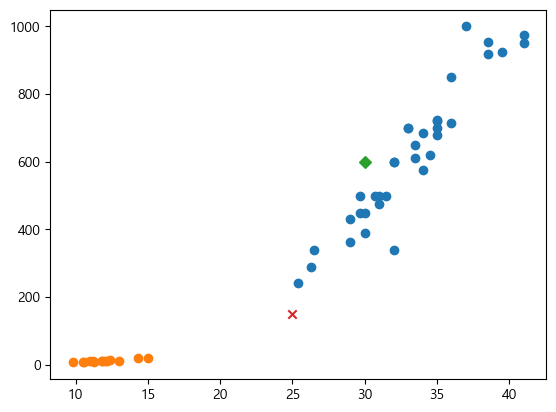

In [357]:
plt.scatter(bream_length,bream_weight)
plt.scatter(smelt_length,smelt_weight)
plt.scatter(30,600,marker='D')# 이거는 도미이다
plt.scatter(25,150,marker='x')# 이거는 빙어이다

In [358]:
len(bream_length) #도미데이터 35개
# len(smelt_length) #빙어데이터 14개

35

In [359]:
### length -> 합치기 (bream_length,smelt_length)
### weight -> 합치기 (bream_weight,smelt_weight)

## datas = [ length, weight ] 합치기

## train_input,test_input,train_target,test_target 

### 데이터 전처리 과정

In [360]:
### length -> 합치기 (bream_length,smelt_length)
length = bream_length+smelt_length
weight = bream_weight+smelt_weight
len(length)
len(weight)
results = [1]*35+[0]*14 # 1: 도미 , 0: 빙어

# zip() : 반복해서 각각list데이터를 1개씩 뽑아서 전달해줌.
# datas = [ [l,w,r] for l,w,r in zip(length,weight,results)]
datas = [ [l,w,r] for l,w,r in zip(length,weight,results)]
df=pd.DataFrame(datas)



In [361]:
# 랜덤숫자 생성
idx=[i for i in range(49)]
random.shuffle(idx)
# idx

In [362]:
# 파이썬 random함수 사용해서 전처리

# 데이터프레임을 사용하지않고 for문을 사용하여 35,14개를 분리해서 출력하시요
train_input=[datas[i] for i in idx[:35]]
test_input=[datas[i] for i in idx[35:]]
train_target=[results[i] for i in idx[:35]]
test_target=[results[i] for i in idx[35:]]

In [363]:
# 데이터 전처리 =pandas사용

# train_input = df.iloc[idx[:35],:-1]
# test_input= df.iloc[idx[35:],:-1]
# train_target = df.iloc[idx[:35],2]
# test_target = df.iloc[idx[35:],2]


In [364]:
df_train=pd.DataFrame(train_input)
df_train.head(1)
df_test=pd.DataFrame(test_input)
df_test.head(1)

,0,1,2
0,26.3,290.0,1


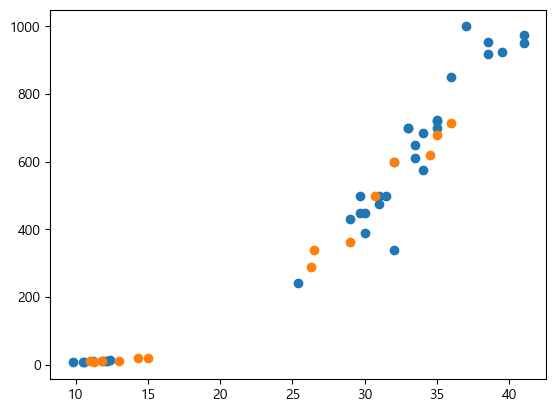

In [365]:
plt.scatter(df_train[0],df_train[1])
plt.scatter(df_test[0],df_test[1])



### KNN근접학습 데이터

In [366]:
# # 2. 데이터 학습시키기
from sklearn.neighbors import KNeighborsClassifier


clf = KNeighborsClassifier()
clf.fit(train_input,train_target)

# 3. 데이터 예측하기
pre = clf.predict(test_input)
print("예측 결과 데이터 : ",pre)

예측 결과 데이터 :  [1 1 0 0 1 0 1 0 1 1 0 0 1 1]


In [367]:
# train_input 몇번째 index 데이터를 사용했는지 알려줌
distances,indexs = clf.kneighbors([[25,150]])

ValueError: X has 2 features, but KNeighborsClassifier is expecting 3 features as input.

In [ ]:
plt.scatter(df_train[0],df_train[1])
plt.scatter(df_test[0],df_test[1])
plt.scatter(df_train.iloc[indexs,0],df_train.iloc[indexs,1])
plt.scatter(25,150,marker='^')

In [ ]:
score = clf.score(test_input,test_target)
print("정답률 : ",score*100,'%')

정답률 :  100.0 %


In [ ]:
pre = clf.predict([[30,600]])
print("test질문의 답 : ",pre)

ValueError: X has 2 features, but KNeighborsClassifier is expecting 3 features as input.

In [ ]:
# 길이 25, 무게 150 고기 무엇인지 판단하시요
# [25,150]
pre = clf.predict([[25,150]])
print("test질문의 답 : ",pre)

ValueError: X has 2 features, but KNeighborsClassifier is expecting 3 features as input.